In [55]:
import pandas as pd
melon = pd.read_csv('3.0a.csv')
melon


,编号,密度,含糖率,好瓜
0,1,0.697,0.4600,1
1,2,0.774,0.3760,1
2,3,0.634,0.2640,1
3,4,0.608,0.3180,1
4,5,0.556,0.2150,1
5,6,0.403,0.2370,1
6,7,0.481,0.1490,1
7,8,0.437,0.2110,1
8,9,0.666,0.0910,0
9,10,0.243,0.0267,0


In [56]:
import numpy as np
X = melon[['密度', '含糖率']].values
y = melon['好瓜'].values
#为了使数据形式符合需要演示需要，将其进行转置
X = X.reshape([2,17])
y = y.reshape([1,17])
X,y

(array([[0.697 , 0.46  , 0.774 , 0.376 , 0.634 , 0.264 , 0.608 , 0.318 ,
         0.556 , 0.215 , 0.403 , 0.237 , 0.481 , 0.149 , 0.437 , 0.211 ,
         0.666 ],
        [0.091 , 0.243 , 0.0267, 0.245 , 0.057 , 0.343 , 0.099 , 0.639 ,
         0.161 , 0.657 , 0.198 , 0.36  , 0.37  , 0.593 , 0.042 , 0.719 ,
         0.103 ]]),
 array([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64))

In [57]:
'''
initialize parameter
'''


def init_params():
	#根据X数据的形状来确定生成w和b
    w = np.ones((2,1))
    b = 0
    return w, b


'''
sigmoid activation func
'''


def sigmoid(Z):
    s = 1 / (1+np.exp(-Z))
    return s


In [58]:
'''
forward prop and compute cost and back prop
'''


def f_prop(w, b, X, y):
    m = X.shape[1]  # 一共有m个实例
    A = sigmoid(np.dot(w.T, X) + b)
    #计算cost函数
    cost = -1/m * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
    #对w和b求导数
    dw = 1/m * np.dot(X, (A-y).T)
    db = 1/m * np.sum(A - y)
    #组合到一个字典
    grads = {'dw': dw, 'db': db}
    return cost, grads


'''
optimize parameters--gradient descent
'''


def op_params(w, b, X, y, num_iter, learning_rate):
    costs = []

    for i in range(num_iter):
        cost, grads = f_prop(w, b, X, y)
        dw = grads['dw']
        db = grads['db']
        #参数最优化
        w = w - learning_rate * dw
        b = b - learning_rate * db
        costs.append(cost)

    params = {'w': w, 'b': b}

    return costs, params


In [59]:
'''
predict
'''


def predict(params, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))

    w = params['w']
    b = params['b']
    print(w,b)
    A = sigmoid(np.dot(w.T, X)+b)
    plt.plot()
    print(A)
    #大于0.5就是真，小于等于0.5就是假
    for i in range(m):
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        if A[0, i] <= 0.5:
            Y_prediction[0, i] = 0
    return Y_prediction


[[1.]
 [1.]] 0


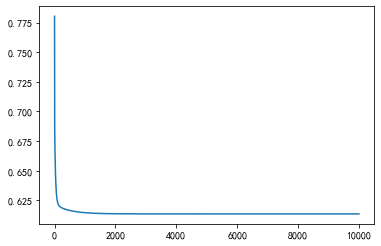

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
'''
merge all the func
'''
w, b = init_params()
print(w,b)
cost, grads = f_prop(w, b, X, y)
costs, params = op_params(w, b, X, y, 10000, 0.9)
plt.plot(costs)


[[5.11662264]
 [0.55397347]] -2.54361249534246
[[0.74518317 0.4861659  0.80712629 0.38129886 0.67522268 0.26838906
  0.65070452 0.36296055 0.59638366 0.25358587 0.40807552 0.24387655
  0.5305751  0.18958186 0.42937992 0.25622203 0.71526974]]
[[1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]]
准确率是： 0.5882352941176471


D:\python\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\python\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


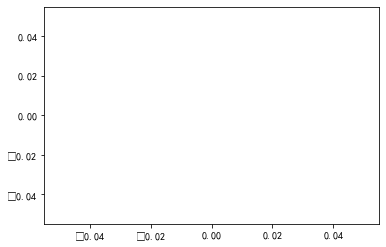

In [61]:
'''
make prediction
'''
Y_prediction = predict(params, X)
print(Y_prediction)
count = 0
for i in range(X.shape[1]):
    if Y_prediction[0, i] == y[0, i]:
        count += 1

precision = count/X.shape[1]
print('准确率是：', precision)
